In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from datetime import datetime as dt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
warnings.filterwarnings("ignore")
sns.set_style("dark")
plt.rcParams['figure.dpi']=100

In [3]:
#Data Loading

In [4]:
product_info = pd.read_csv('../DATA/product_info.csv')
customer_product = pd.read_csv('../DATA/customer_product.csv', index_col = 0)
customer_info = pd.read_csv('../DATA/customer_info.csv', index_col = 0)
customer_cases = pd.read_csv('../DATA/customer_cases.csv', index_col = 0)

In [5]:
#Data Preparation and Cleaning

In [6]:
product_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [7]:
print(product_info.isnull().sum())

product_id       0
name             0
price            0
billing_cycle    0
dtype: int64


In [8]:
customer_product.head()

,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [9]:
customer_product.rename(columns = {'product':'product_id'}, inplace = True)

In [10]:
customer_product.head()

,customer_id,product_id,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [11]:
churn = list()
for customer in customer_product["cancel_date_time"]:
    if type(customer)==float:
        churn.append(0)
    else:
        churn.append(1)
customer_product["chur"]=churn
customer_product.head()

,customer_id,product_id,signup_date_time,cancel_date_time,chur
1,C2448,prd_1,2017-01-01 10:35:09,NaN,0
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1
4,C2451,prd_2,2017-01-01 13:32:08,NaN,0
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1


In [12]:
customer_product['signup_date'] = customer_product['signup_date_time'].astype('datetime64').dt.date.astype('datetime64')
customer_product['cancel_date'] = customer_product['cancel_date_time'].astype('datetime64').dt.date.astype('datetime64')
customer_product['cancel_date'].fillna(dt(2022,1,1), inplace=True)

customer_product['signup_year'] = customer_product['signup_date'].dt.year.astype('int64')
customer_product['signup_month'] = customer_product['signup_date'].dt.month.astype('int64')
customer_product['cancel_year'] = customer_product['cancel_date'].dt.year.astype('int64')
customer_product['cancel_month'] = customer_product['cancel_date'].dt.month.astype('int64')

customer_product['duration'] = (customer_product['cancel_date'] - customer_product['signup_date']).dt.days.astype('int64')

In [13]:
customer_product

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration
1,C2448,prd_1,2017-01-01 10:35:09,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,9,1708
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,1,742
4,C2451,prd_2,2017-01-01 13:32:08,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2017-01-01,2021-06-28,2017,1,2021,6,1639
...,...,...,...,...,...,...,...,...,...,...,...,...
508928,C511375,prd_2,2021-12-31 18:37:58,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1
508929,C511376,prd_2,2021-12-31 18:42:00,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1
508930,C511377,prd_2,2021-12-31 18:50:53,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1
508931,C511378,prd_2,2021-12-31 19:00:38,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1


In [14]:
customer_product['product_id'].value_counts()

prd_1    325649
prd_2    183283
Name: product_id, dtype: int64

In [15]:
customer_product['chur'].value_counts()

0    396447
1    112485
Name: chur, dtype: int64

In [16]:
list1 = ["product_id"]
customer_product_info = customer_product.merge(product_info,
                   on = list1, 
                   how = 'outer')
customer_product_info

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration,name,price,billing_cycle
0,C2448,prd_1,2017-01-01 10:35:09,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826,annual_subscription,1200,12
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,9,1708,annual_subscription,1200,12
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,1,742,annual_subscription,1200,12
3,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2017-01-01,2021-06-28,2017,1,2021,6,1639,annual_subscription,1200,12
4,C2453,prd_1,2017-01-01 15:26:14,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826,annual_subscription,1200,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,prd_2,2021-12-31 18:37:58,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1
508928,C511376,prd_2,2021-12-31 18:42:00,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1
508929,C511377,prd_2,2021-12-31 18:50:53,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1
508930,C511378,prd_2,2021-12-31 19:00:38,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1


In [17]:
print(customer_product.isnull().sum())

customer_id              0
product_id               0
signup_date_time         0
cancel_date_time    396447
chur                     0
signup_date              0
cancel_date              0
signup_year              0
signup_month             0
cancel_year              0
cancel_month             0
duration                 0
dtype: int64


In [18]:
customer_info.head()

,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male


In [19]:
print(customer_info.isnull().sum())

customer_id    0
age            0
gender         0
dtype: int64


In [20]:
customer_info['gender'].value_counts()

male      309930
female    199002
Name: gender, dtype: int64

In [21]:
customer_info.insert(2,"agerange",pd.cut(customer_info["age"], [18, 35, 50, 65,150], labels=["18-35", "35-50", "50-65","65+"]))

In [22]:
list2 = ["customer_id"]
customer_product2 = customer_product_info.merge(customer_info,
                   on = list2, 
                   how = 'outer')
customer_product2

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration,name,price,billing_cycle,age,agerange,gender
0,C2448,prd_1,2017-01-01 10:35:09,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826,annual_subscription,1200,12,76,65+,female
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,9,1708,annual_subscription,1200,12,61,50-65,male
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,1,742,annual_subscription,1200,12,58,50-65,female
3,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2017-01-01,2021-06-28,2017,1,2021,6,1639,annual_subscription,1200,12,71,65+,male
4,C2453,prd_1,2017-01-01 15:26:14,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826,annual_subscription,1200,12,56,50-65,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,prd_2,2021-12-31 18:37:58,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1,53,50-65,male
508928,C511376,prd_2,2021-12-31 18:42:00,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1,60,50-65,male
508929,C511377,prd_2,2021-12-31 18:50:53,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1,67,65+,female
508930,C511378,prd_2,2021-12-31 19:00:38,NaN,0,2021-12-31,2022-01-01,2021,12,2022,1,1,monthly_subscription,125,1,49,35-50,male


In [23]:
customer_cases.head()

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [24]:
print(customer_cases.isnull().sum())

case_id        0
date_time      0
customer_id    0
channel        0
reason         0
dtype: int64


In [25]:
customer_cases['reason'].value_counts()

support    200985
signup     129527
Name: reason, dtype: int64

In [26]:
list3 = ["customer_id"]
customer_final = customer_product2.merge(customer_cases,
                   on = list3, 
                   how = 'outer')
customer_final

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,...,name,price,billing_cycle,age,agerange,gender,case_id,date_time,channel,reason
0,C2448,prd_1,2017-01-01 10:35:09,NaN,0,2017-01-01,2022-01-01,2017,1,2022,...,annual_subscription,1200,12,76,65+,female,CC101,2017-01-01 10:32:03,phone,signup
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,...,annual_subscription,1200,12,61,50-65,male,CC102,2017-01-01 11:35:47,phone,signup
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,...,annual_subscription,1200,12,58,50-65,female,CC103,2017-01-01 11:37:09,phone,signup
3,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2017-01-01,2021-06-28,2017,1,2021,...,annual_subscription,1200,12,71,65+,male,CC105,2017-01-01 13:52:22,phone,signup
4,C2453,prd_1,2017-01-01 15:26:14,NaN,0,2017-01-01,2022-01-01,2017,1,2022,...,annual_subscription,1200,12,56,50-65,male,CC106,2017-01-01 15:23:02,phone,signup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580779,C511375,prd_2,2021-12-31 18:37:58,NaN,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,53,50-65,male,NaN,NaN,NaN,NaN
580780,C511376,prd_2,2021-12-31 18:42:00,NaN,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,60,50-65,male,NaN,NaN,NaN,NaN
580781,C511377,prd_2,2021-12-31 18:50:53,NaN,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,67,65+,female,NaN,NaN,NaN,NaN
580782,C511378,prd_2,2021-12-31 19:00:38,NaN,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,49,35-50,male,NaN,NaN,NaN,NaN


In [27]:
customer_final.dtypes

customer_id                 object
product_id                  object
signup_date_time            object
cancel_date_time            object
chur                         int64
signup_date         datetime64[ns]
cancel_date         datetime64[ns]
signup_year                  int64
signup_month                 int64
cancel_year                  int64
cancel_month                 int64
duration                     int64
name                        object
price                        int64
billing_cycle                int64
age                          int64
agerange                  category
gender                      object
case_id                     object
date_time                   object
channel                     object
reason                      object
dtype: object

In [28]:
print(customer_final.isnull().sum())

customer_id              0
product_id               0
signup_date_time         0
cancel_date_time    451191
chur                     0
signup_date              0
cancel_date              0
signup_year              0
signup_month             0
cancel_year              0
cancel_month             0
duration                 0
name                     0
price                    0
billing_cycle            0
age                      0
agerange                 0
gender                   0
case_id             250272
date_time           250272
channel             250272
reason              250272
dtype: int64


In [29]:
customer_final[customer_final.duplicated(keep=False)]

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,...,name,price,billing_cycle,age,agerange,gender,case_id,date_time,channel,reason


In [30]:
customer_final.describe().T

,count,mean,std,min,25%,50%,75%,max
chur,580784.0,0.223135,0.416348,0.0,0.0,0.0,0.0,1.0
signup_year,580784.0,2019.700765,1.218363,2017.0,2019.0,2020.0,2021.0,2021.0
signup_month,580784.0,5.609712,3.194347,1.0,3.0,5.0,8.0,12.0
cancel_year,580784.0,2021.596726,0.886408,2017.0,2022.0,2022.0,2022.0,2022.0
cancel_month,580784.0,2.371079,3.011829,1.0,1.0,1.0,1.0,12.0
duration,580784.0,583.429530,427.360972,1.0,240.0,498.0,859.0,1826.0
price,580784.0,781.214143,524.226740,125.0,125.0,1200.0,1200.0,1200.0
billing_cycle,580784.0,7.714749,5.364181,1.0,1.0,12.0,12.0,12.0
age,580784.0,58.341015,8.505962,21.0,53.0,59.0,64.0,78.0


In [31]:
#Observations
#the average customer age is 58.3 years
#the average subscription length is 583 days
#the average cancel month occurs in February
#the average signup month occurs in May

In [32]:
#Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'chur'}>,
        <AxesSubplot:title={'center':'signup_date'}>,
        <AxesSubplot:title={'center':'cancel_date'}>],
       [<AxesSubplot:title={'center':'signup_year'}>,
        <AxesSubplot:title={'center':'signup_month'}>,
        <AxesSubplot:title={'center':'cancel_year'}>],
       [<AxesSubplot:title={'center':'cancel_month'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'billing_cycle'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

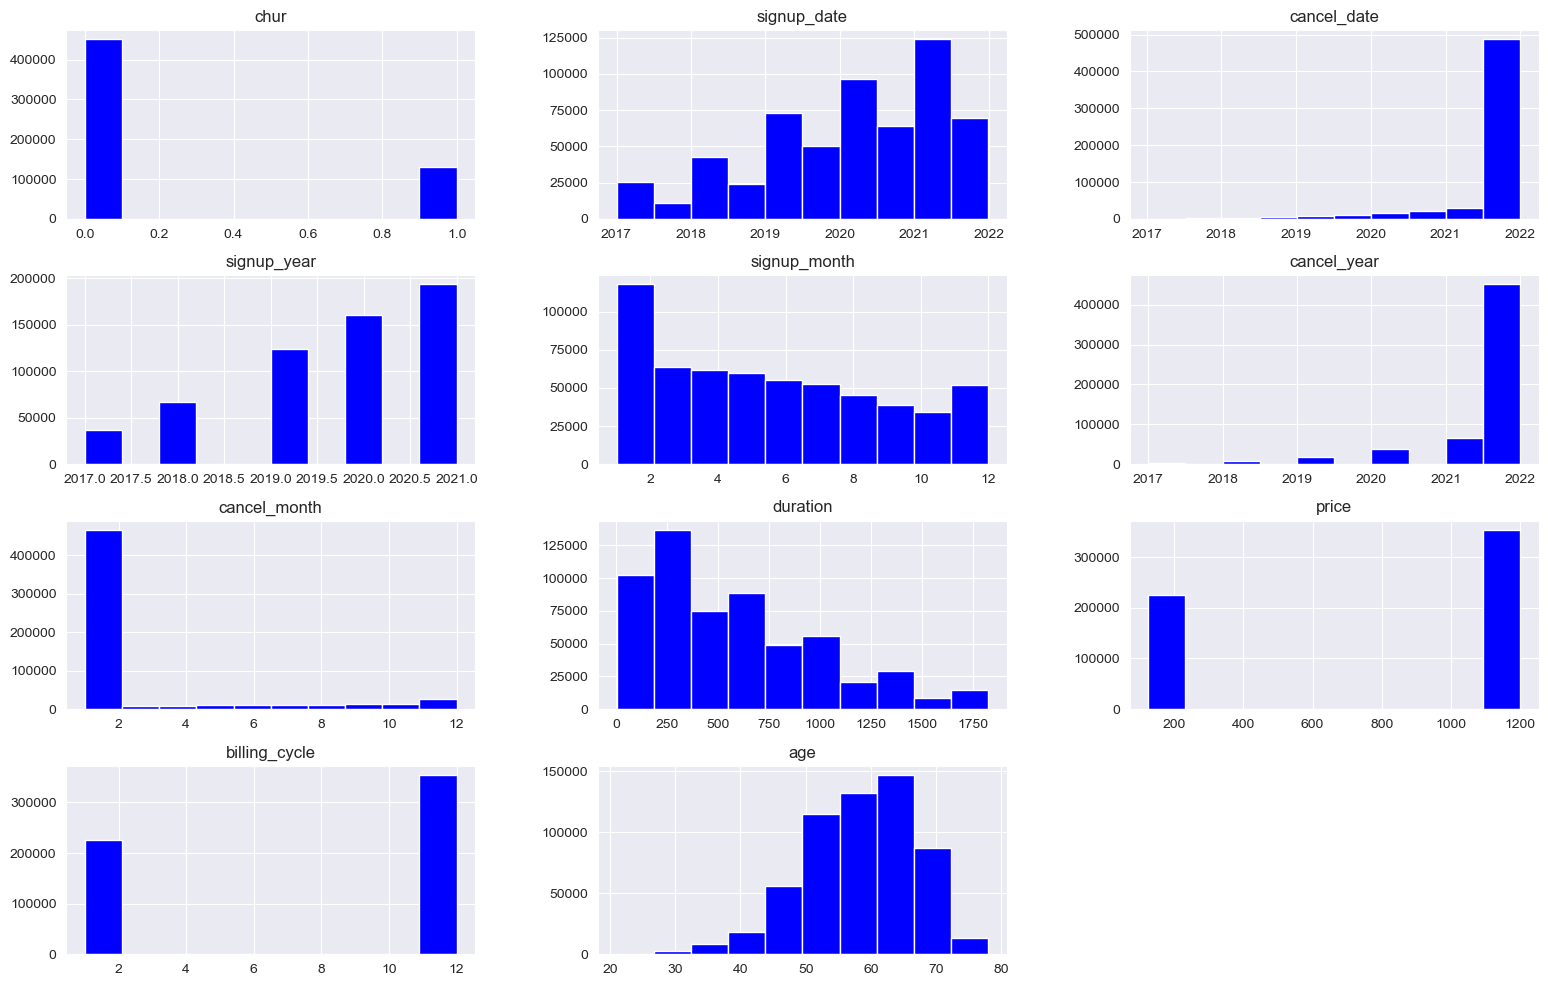

In [33]:
customer_final.hist
customer_final.hist(figsize=(19,12), color="Blue")

In [34]:
#Observations
#More customers signup in the first 6 months of very year
#The highest number of customers have cancelled in the last 6 months of 2021

Text(0.5, 1.0, 'New Signups by Gender per Month')

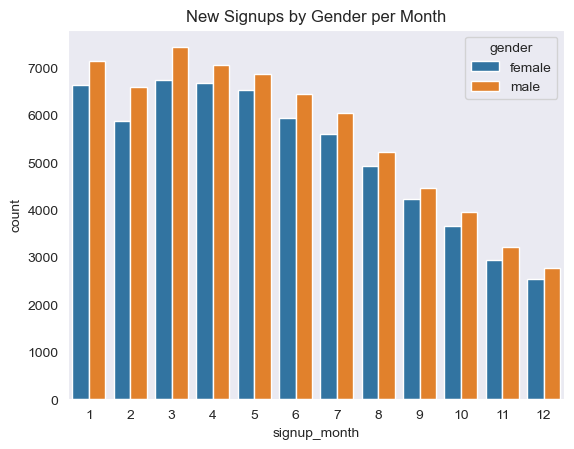

In [35]:
p = sns.countplot(x='signup_month', data=customer_final[customer_final['reason'] == 'signup'], hue='gender')
p.set_title('New Signups by Gender per Month')

Text(0.5, 1.0, 'New Signups by Gender per Year')

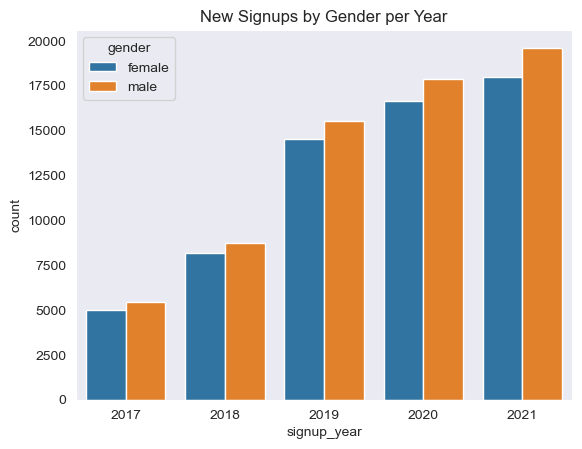

In [36]:
p = sns.countplot(x='signup_year', data=customer_final[customer_final['reason'] == 'signup'], hue='gender')
p.set_title('New Signups by Gender per Year')

Text(0.5, 1.0, 'New Signups by Month')

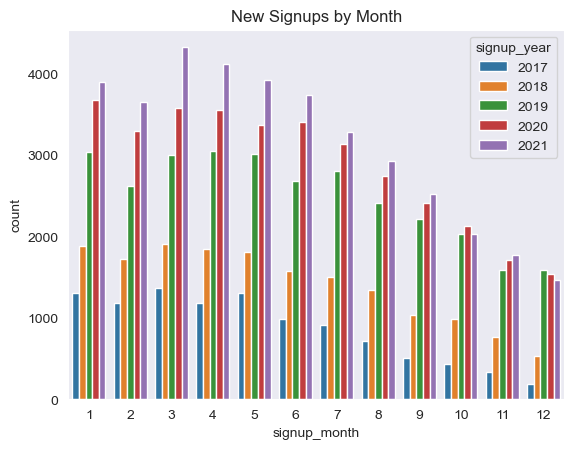

In [37]:
p = sns.countplot(x='signup_month', data=customer_final[customer_final['reason'] == 'signup'], hue='signup_year')
p.set_title('New Signups by Month')

Text(0.5, 1.0, 'New Signups by Product per Year')

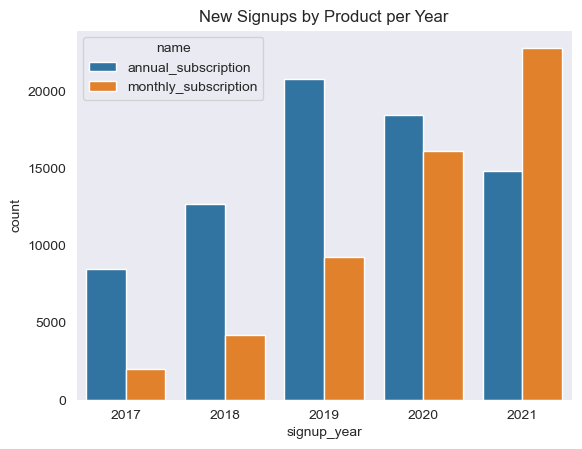

In [38]:
p = sns.countplot(x='signup_year', data=customer_final[customer_final['reason'] == 'signup'], hue='name')
p.set_title('New Signups by Product per Year')

Text(0.5, 1.0, 'New Signups by Product per Agerange')

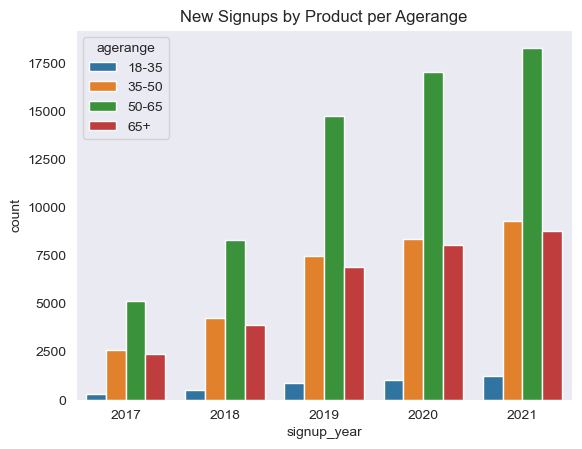

In [39]:
p = sns.countplot(x='signup_year', data=customer_final[customer_final['reason'] == 'signup'], hue='agerange')
p.set_title('New Signups by Product per Agerange')

Text(0.5, 1.0, 'New Signups by Product per Month')

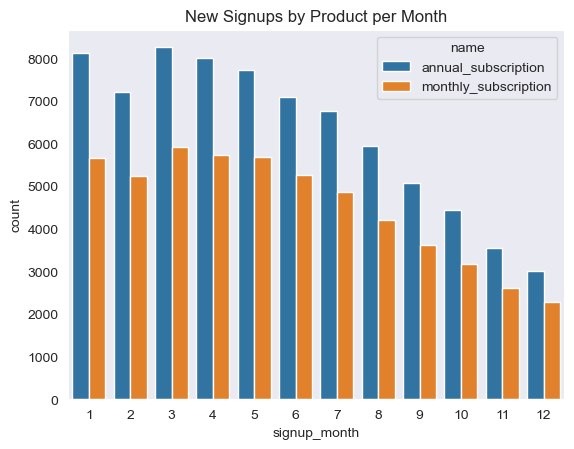

In [40]:
p = sns.countplot(x='signup_month', data=customer_final[customer_final['reason'] == 'signup'], hue='name')
p.set_title('New Signups by Product per Month')

Text(0.5, 1.0, 'Correlation Heatmap of Customer Subscription Data')

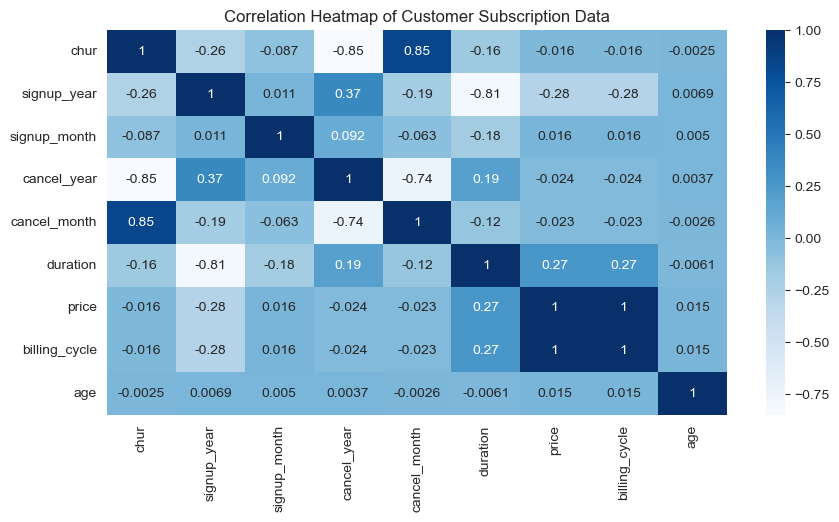

In [41]:
plt.figure(figsize=(10,5))
c=customer_final.corr()
sns.heatmap(c, cmap="Blues",annot=True)
c
plt.title("Correlation Heatmap of Customer Subscription Data")

In [42]:
#Observations
#churn strong correlations with signup_year, signup_month, cancel_year and cancel_month however we won't be including these in the model because they will skew the data

In [43]:
sns.pairplot(customer_final, hue = "chur", corner=True)

In [44]:
def probability_plot(columns):
    global customer_final
    customer_final.groupby(columns)["chur"].mean().plot(kind="barh",label="Churn Probability")
    plt.vlines(x=customer_final["chur"].mean(),ymin=-1, ymax=8, color="red",
               label="Average of Churn Probability",ls="--")
    plt.legend(bbox_to_anchor=(0.75,1.15),ncol=2, fancybox=True, shadow=True)
    plt.xlabel("Probability")
    plt.show()

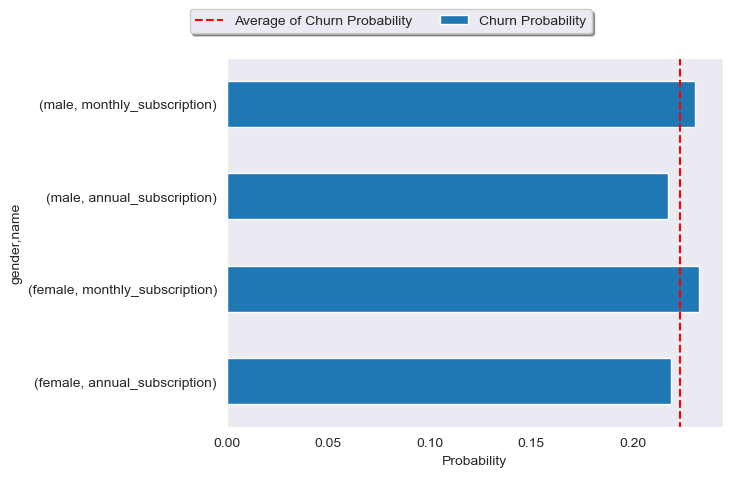

In [45]:
probability_plot(["gender","name"])

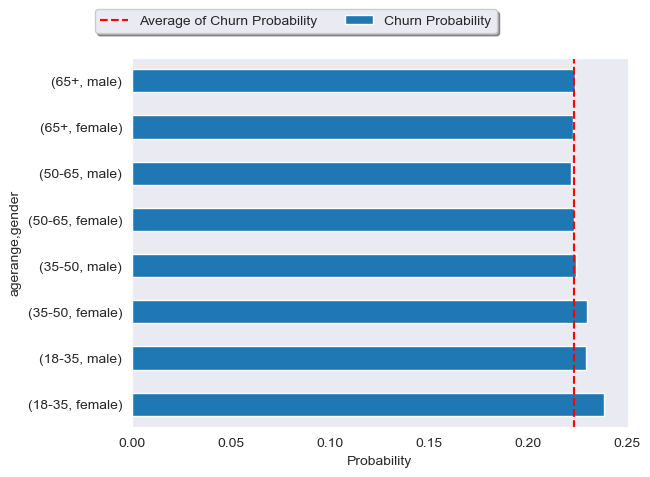

In [46]:
probability_plot(["agerange","gender"])

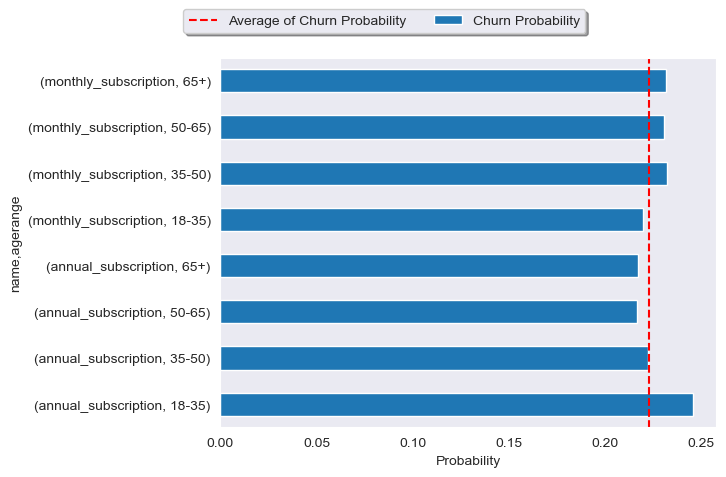

In [47]:
probability_plot(["name","agerange"])

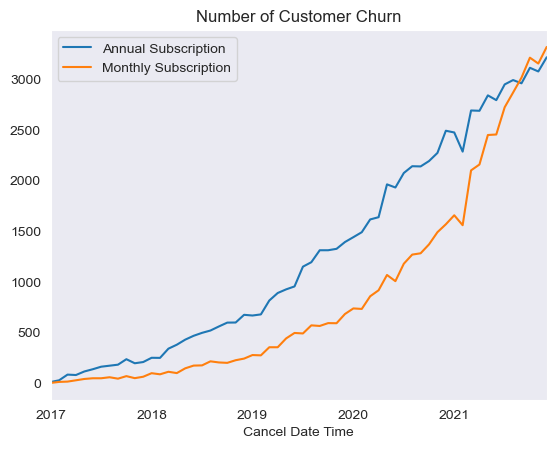

In [48]:
customer_final["cancel_date_time"] = pd.to_datetime(customer_final["cancel_date_time"])
groupby = customer_final.groupby([pd.Grouper(key="cancel_date_time", freq="MS")])["name"].value_counts().reset_index(name="num_customer")
groupby.columns = ["Cancel Date Time", "Product", "Number of New Customer"]
pivot = groupby.pivot(values="Number of New Customer",index="Cancel Date Time",columns="Product")
pivot.columns = ["Annual Subscription", "Monthly Subscription"]
pivot.index.freq= "MS"
pivot.plot()
plt.title("Number of Customer Churn")
plt.show()

In [49]:
customer_final

,customer_id,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,...,name,price,billing_cycle,age,agerange,gender,case_id,date_time,channel,reason
0,C2448,prd_1,2017-01-01 10:35:09,NaT,0,2017-01-01,2022-01-01,2017,1,2022,...,annual_subscription,1200,12,76,65+,female,CC101,2017-01-01 10:32:03,phone,signup
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,...,annual_subscription,1200,12,61,50-65,male,CC102,2017-01-01 11:35:47,phone,signup
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,...,annual_subscription,1200,12,58,50-65,female,CC103,2017-01-01 11:37:09,phone,signup
3,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,1,2017-01-01,2021-06-28,2017,1,2021,...,annual_subscription,1200,12,71,65+,male,CC105,2017-01-01 13:52:22,phone,signup
4,C2453,prd_1,2017-01-01 15:26:14,NaT,0,2017-01-01,2022-01-01,2017,1,2022,...,annual_subscription,1200,12,56,50-65,male,CC106,2017-01-01 15:23:02,phone,signup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580779,C511375,prd_2,2021-12-31 18:37:58,NaT,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,53,50-65,male,NaN,NaN,NaN,NaN
580780,C511376,prd_2,2021-12-31 18:42:00,NaT,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,60,50-65,male,NaN,NaN,NaN,NaN
580781,C511377,prd_2,2021-12-31 18:50:53,NaT,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,67,65+,female,NaN,NaN,NaN,NaN
580782,C511378,prd_2,2021-12-31 19:00:38,NaT,0,2021-12-31,2022-01-01,2021,12,2022,...,monthly_subscription,125,1,49,35-50,male,NaN,NaN,NaN,NaN


In [50]:
customer_final.drop(columns=['signup_date','cancel_date', 'signup_date_time', 'cancel_date_time', 'customer_id', 'product_id', 'date_time', 'case_id', 'signup_year', 'signup_month', 'cancel_year', 'cancel_month', 'age'], inplace=True)
customer_final.dtypes

chur           int64
duration       int64
name          object
price          int64
agerange    category
gender        object
dtype: object

In [51]:
print(customer_final.isnull().sum())

chur        0
duration    0
name        0
price       0
agerange    0
gender      0
dtype: int64


In [52]:
customer_final['channel'] = customer_final['channel'].fillna(2)
customer_final['reason'] = customer_final['reason'].fillna(2)

In [53]:
customer_final['name'] = customer_final['name'].replace({"annual_subscription":0, "monthly_subscription":1})
customer_final['agerange'] = customer_final['agerange'].replace({"18-35":0, "35-50":1, "50-65":2, "65+":3})
customer_final['agerange'] = customer_final['agerange'].astype(int)
customer_final['gender'] = customer_final['gender'].replace({"male":0, "female":1})
customer_final['channel'] = customer_final['channel'].replace({"phone":0, "email":1, "NaN":2})
customer_final['reason'] = customer_final['reason'].replace({"support":0, "signup":1, "NaN":2})

In [54]:
customer_final

,chur,duration,name,price,agerange,gender
0,0,1826,0,1200,3,1
1,1,1708,0,1200,2,0
2,1,742,0,1200,2,1
3,1,1639,0,1200,3,0
4,0,1826,0,1200,2,0
...,...,...,...,...,...,...
580779,0,1,1,125,2,0
580780,0,1,1,125,2,0
580781,0,1,1,125,3,1
580782,0,1,1,125,1,0


In [55]:
customer_final.dtypes

chur        int64
duration    int64
name        int64
price       int64
agerange    int32
gender      int64
dtype: object

Text(0.5, 1.0, 'Correlation Heatmap of Customer Subscription Data')

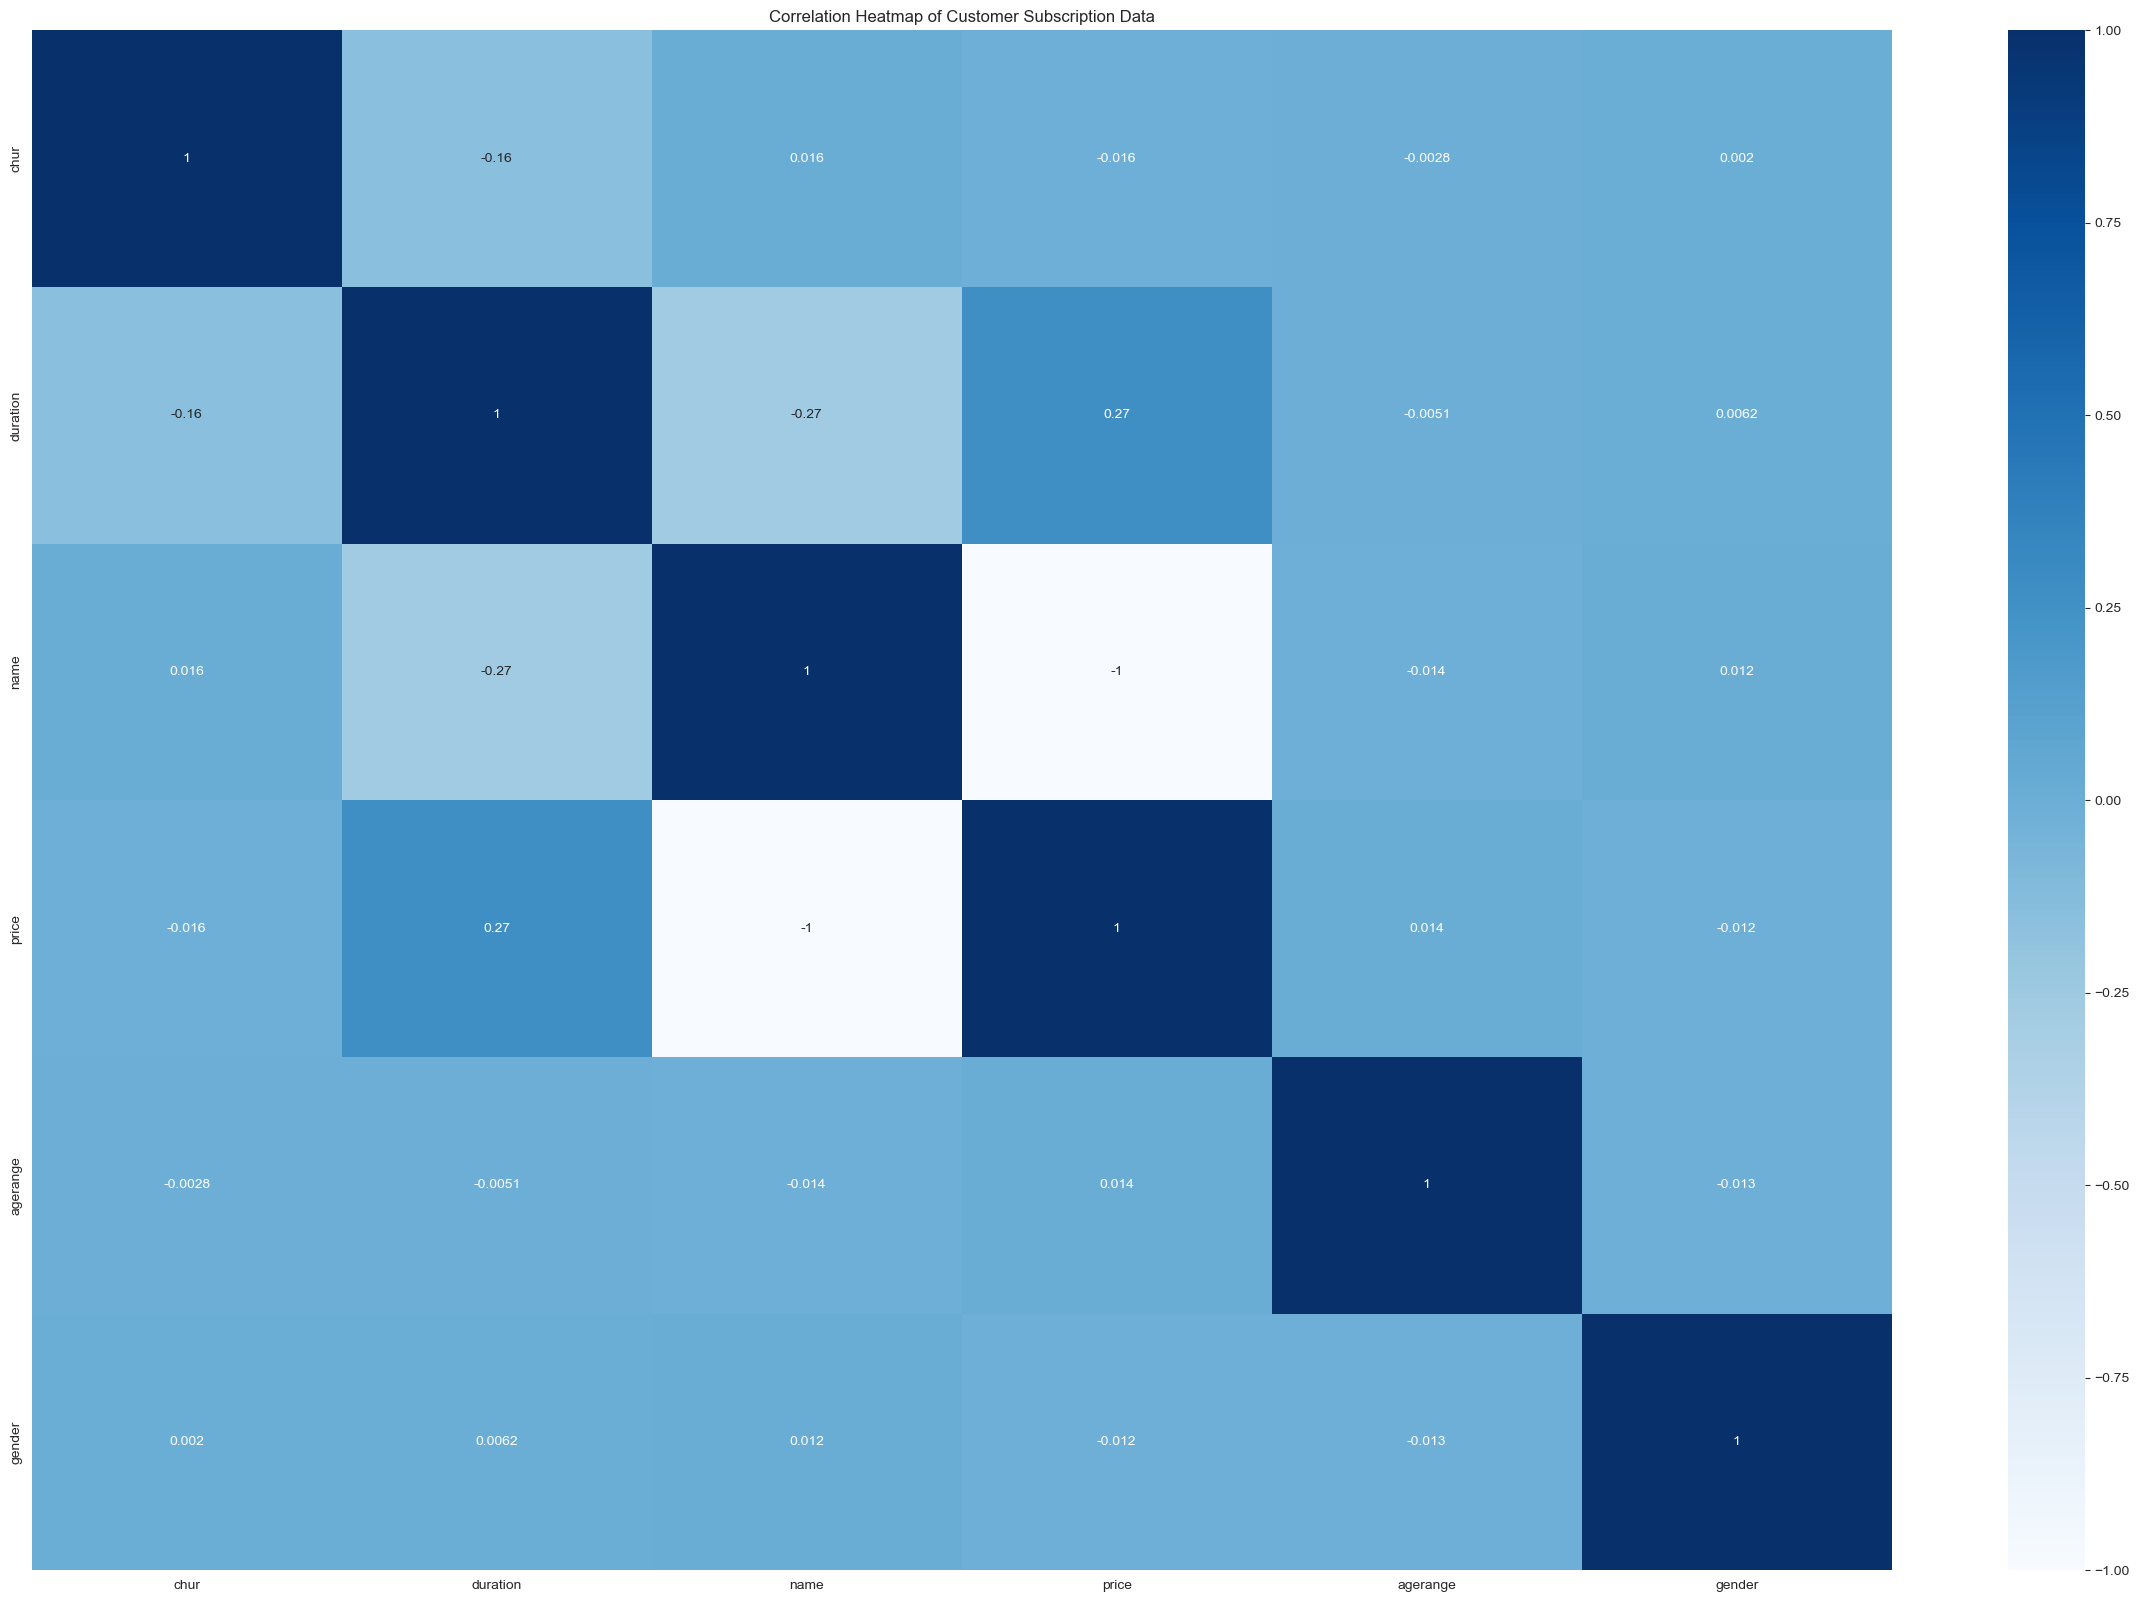

In [56]:
plt.figure(figsize=(30,20))
c=customer_final.corr()
sns.heatmap(c, cmap="Blues",annot=True)
c
plt.title("Correlation Heatmap of Customer Subscription Data")

In [57]:
#Train-test Split

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
#Here we'll scale the data to counter the imbalance that exist with customer churn or not

In [60]:
X = StandardScaler().fit_transform(customer_final.drop("chur",axis=1))
y = customer_final["chur"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [62]:
#As this is a classification prediction we'll be testing with MLP, Logistic Regression and Naive Bayes models

In [63]:
net = MLPClassifier()
net.hidden_layer_sizes=(30,60,30)
net.activation='relu'
net.solver='adam'
net.max_iter=30
net.verbose = True
net.batch_size = 1000

In [64]:
net.fit(X_train,y_train)

Iteration 1, loss = 0.52559084
Iteration 2, loss = 0.51528330
Iteration 3, loss = 0.51385913
Iteration 4, loss = 0.51334147
Iteration 5, loss = 0.51315192
Iteration 6, loss = 0.51304138
Iteration 7, loss = 0.51276768
Iteration 8, loss = 0.51259912
Iteration 9, loss = 0.51250659
Iteration 10, loss = 0.51235165
Iteration 11, loss = 0.51231409
Iteration 12, loss = 0.51204472
Iteration 13, loss = 0.51194585
Iteration 14, loss = 0.51178670
Iteration 15, loss = 0.51164507
Iteration 16, loss = 0.51150352
Iteration 17, loss = 0.51132956
Iteration 18, loss = 0.51134658
Iteration 19, loss = 0.51120950
Iteration 20, loss = 0.51098948
Iteration 21, loss = 0.51081307
Iteration 22, loss = 0.51064113
Iteration 23, loss = 0.51060517
Iteration 24, loss = 0.51058272
Iteration 25, loss = 0.51046471
Iteration 26, loss = 0.51036571
Iteration 27, loss = 0.51009896
Iteration 28, loss = 0.51011502
Iteration 29, loss = 0.51001012
Iteration 30, loss = 0.50993407


MLPClassifier(batch_size=1000, hidden_layer_sizes=(30, 60, 30), max_iter=30,
              verbose=True)

In [65]:
net.score(X_test, y_test)

0.777382400881563

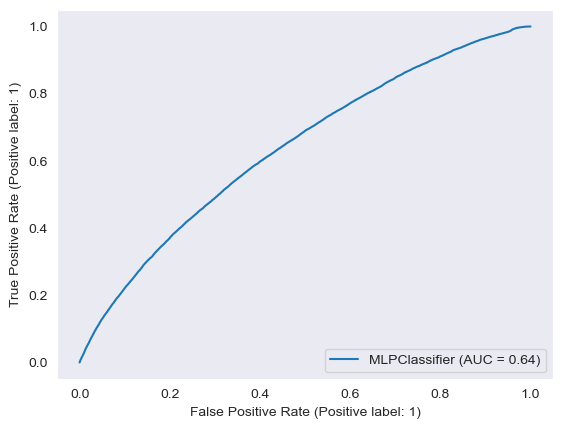

In [66]:
plot_roc_curve(net, X_test,y_test)
plt.show()

In [67]:
cr = pd.DataFrame(classification_report(net.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

cr['support'] = cr.support.apply(int)

cr.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'])

,precision,recall,f1-score,support
0,0.995985,0.779165,0.874333,173179
1,0.013236,0.485336,0.025770,1057
accuracy,0.777382,0.777382,0.777382,0
macro avg,0.504610,0.632250,0.450052,174236
weighted avg,0.990023,0.777382,0.869186,174236


In [68]:
lin_model = LogisticRegression(solver='liblinear')
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.7775603204848596

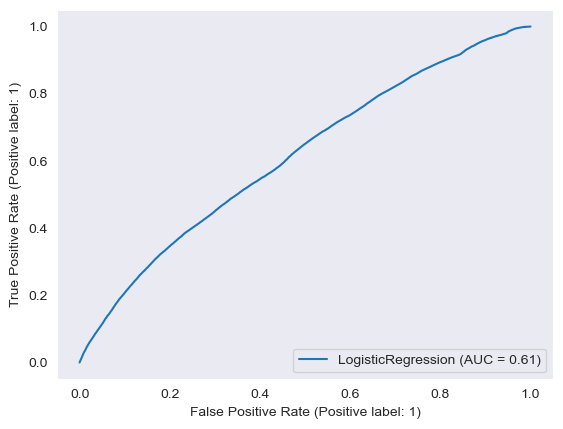

In [69]:
plot_roc_curve(lin_model, X_test,y_test)
plt.show()

In [70]:
crlin = pd.DataFrame(classification_report(lin_model.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

crlin['support'] = cr.support.apply(int)

crlin.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'])

,precision,recall,f1-score,support
0,1.000000,0.777560,0.874862,173179
1,0.000000,0.000000,0.000000,1057
accuracy,0.777560,0.777560,0.777560,0
macro avg,0.500000,0.388780,0.437431,174236
weighted avg,1.000000,0.777560,0.874862,174236


In [71]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7775603204848596

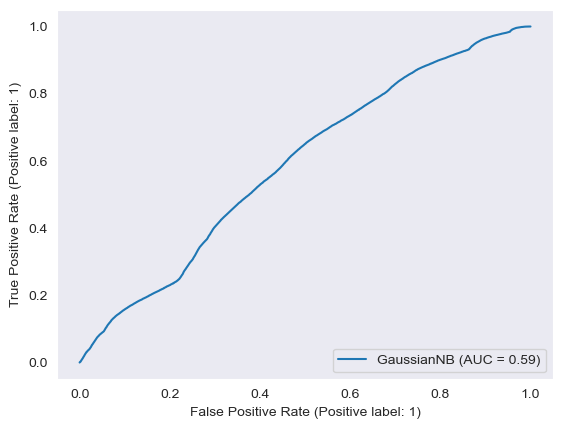

In [72]:
plot_roc_curve(model, X_test,y_test)
plt.show()

In [73]:
#Predict Score
crmodel = pd.DataFrame(classification_report(model.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

crmodel['support'] = crmodel.support.apply(int)

crmodel.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'1', :'f1-score'])

,precision,recall,f1-score,support
0,1.000000,0.777560,0.874862,174236
1,0.000000,0.000000,0.000000,0
accuracy,0.777560,0.777560,0.777560,0
macro avg,0.500000,0.388780,0.437431,174236
weighted avg,1.000000,0.777560,0.874862,174236


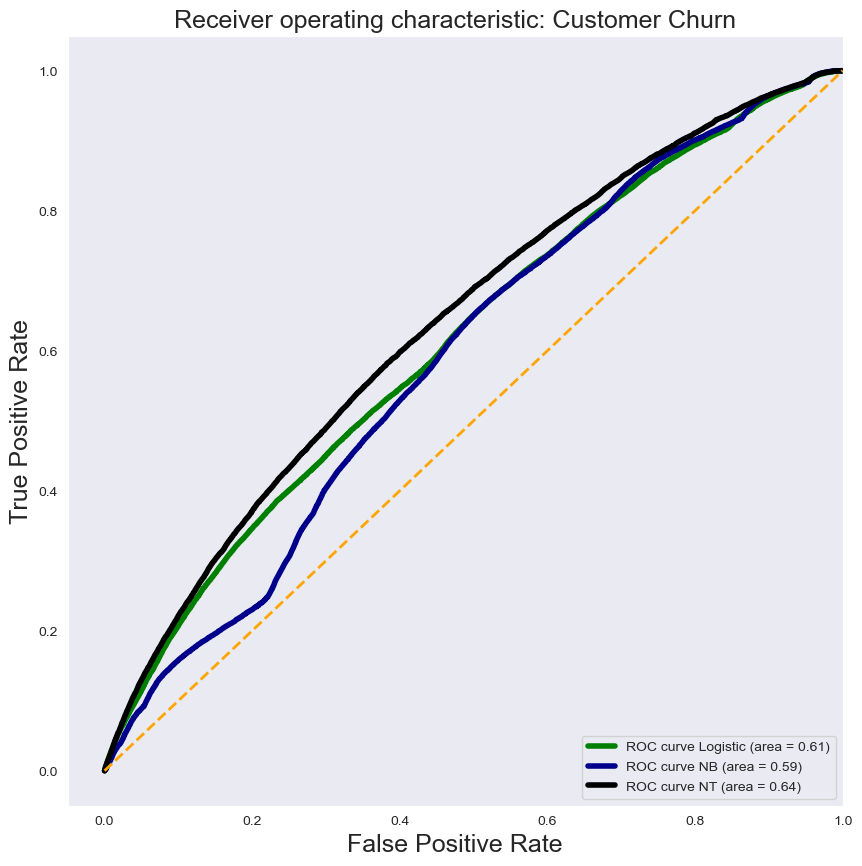

In [74]:
yhat_pp_lr = lin_model.predict_proba(X_test)[:,1]
#yhat_pp_svc = svc_model.predict_proba(X_test)[:,1]
yhat_pp_nb = model.predict_proba(X_test)[:,1]
yhat_pp_nt = net.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yhat_pp_lr)
#fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp_svc)
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb)
fpr_nt, tpr_nt, _ = roc_curve(y_test, yhat_pp_nt)

plt.figure(figsize=[10,10])
lw = 2
plt.plot(fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=4, color='green')
#plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.plot(fpr_nt, tpr_nt, label='ROC curve NT (area = %0.2f)' % auc(fpr_nt, tpr_nt), linewidth=4, color='black')

plt.plot([0, 1], [0, 1], color = 'orange', lw = lw, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: Customer Churn', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [75]:
#Time Series Analysis (to predict monthly subscriptions)

In [76]:
customer_cases

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup
...,...,...,...,...,...
330508,CC330608,2021-12-31 19:16:28,C173079,email,support
330509,CC330609,2021-12-31 19:36:42,C497581,email,support
330510,CC330610,2021-12-31 20:30:02,C127630,email,support
330511,CC330611,2021-12-31 21:30:00,C497538,email,support


In [77]:
customer_cases['date'] = customer_cases['date_time'].astype('datetime64').dt.date.astype('datetime64')
customer_cases.drop(columns=['date_time'], inplace=True)

In [78]:
customer_cases.describe().T

,count,unique,top,freq,first,last
case_id,330512,330512,CC101,1,NaT,NaT
customer_id,330512,258660,C20510,5,NaT,NaT
channel,330512,2,phone,286840,NaT,NaT
reason,330512,2,support,200985,NaT,NaT
date,330512,1827,2021-06-14 00:00:00,522,2017-01-01,2022-01-01


In [79]:
customer_cases['year'] = customer_cases['date'].dt.year.astype('int64')
customer_cases['month'] = customer_cases['date'].dt.month.astype('int64')

customer_cases.head()

,case_id,customer_id,channel,reason,date,year,month
1,CC101,C2448,phone,signup,2017-01-01,2017,1
2,CC102,C2449,phone,signup,2017-01-01,2017,1
3,CC103,C2450,phone,signup,2017-01-01,2017,1
4,CC104,C2451,phone,signup,2017-01-01,2017,1
5,CC105,C2452,phone,signup,2017-01-01,2017,1


In [80]:
unique_cust_case_year_month = customer_cases.drop_duplicates(subset=['customer_id', 'year', 'month'], keep='first')
cust_sub = pd.merge(unique_cust_case_year_month, customer_product, on=['customer_id'])
cust_sub

,case_id,customer_id,channel,reason,date,year,month,product_id,signup_date_time,cancel_date_time,chur,signup_date,cancel_date,signup_year,signup_month,cancel_year,cancel_month,duration
0,CC101,C2448,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01 10:35:09,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826
1,CC102,C2449,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,1,2017-01-01,2021-09-05,2017,1,2021,9,1708
2,CC103,C2450,phone,signup,2017-01-01,2017,1,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,1,2017-01-01,2019-01-13,2017,1,2019,1,742
3,CC104,C2451,phone,signup,2017-01-01,2017,1,prd_2,2017-01-01 13:32:08,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826
4,CC4491,C2451,phone,support,2017-03-31,2017,3,prd_2,2017-01-01 13:32:08,NaN,0,2017-01-01,2022-01-01,2017,1,2022,1,1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324585,CC330604,C484812,email,support,2021-12-31,2021,12,prd_2,2021-09-07 17:38:49,NaN,0,2021-09-07,2022-01-01,2021,9,2022,1,116
324586,CC330608,C173079,email,support,2021-12-31,2021,12,prd_1,2018-05-22 17:27:36,NaN,0,2018-05-22,2022-01-01,2018,5,2022,1,1320
324587,CC330609,C497581,email,support,2021-12-31,2021,12,prd_2,2021-10-25 14:12:27,NaN,0,2021-10-25,2022-01-01,2021,10,2022,1,68
324588,CC330611,C497538,email,support,2021-12-31,2021,12,prd_2,2021-10-25 13:19:07,NaN,0,2021-10-25,2022-01-01,2021,10,2022,1,68


In [81]:
signup_df= cust_sub[cust_sub['reason']=='signup'].groupby(['year', 'month']).size().reset_index(name='signup')
signup_df

,year,month,signup
0,2017,1,1306
1,2017,2,1183
2,2017,3,1367
3,2017,4,1182
4,2017,5,1299
5,2017,6,990
6,2017,7,909
7,2017,8,721
8,2017,9,513
9,2017,10,431


In [82]:
cust_cancel_df = cust_sub[cust_sub['cancel_year']!=2022].groupby(['cancel_year', 'cancel_month']).size().reset_index(name='cust_cancel')
cust_cancel_df

,cancel_year,cancel_month,cust_cancel
0,2017,1,13
1,2017,2,20
2,2017,3,62
3,2017,4,75
4,2017,5,115
5,2017,6,119
6,2017,7,152
7,2017,8,153
8,2017,9,146
9,2017,10,192


In [83]:
year = np.array([2017, 2018, 2019, 2020, 2021])
month = np.arange(1, 13)
total_sub = np.zeros((60,4))
idx=0

for y in year:
    for m in month:
        total_sub[idx][0] = y
        total_sub[idx][1] = m
        if m == 12:
            total_sub[idx][2] = cust_sub[(cust_sub['signup_date']<dt(y+1,1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['signup_month']==m)&(cust_sub['product_id']=='prd_1')].count().tolist()[0]
            total_sub[idx][3] = cust_sub[(cust_sub['signup_date']<dt(y+1,1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['product_id']=='prd_2')].count().tolist()[0]
        else:
            total_sub[idx][2] = cust_sub[(cust_sub['signup_date']<dt(y,m+1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['signup_month']==m)&(cust_sub['product_id']=='prd_1')].count().tolist()[0]
            total_sub[idx][3] = cust_sub[(cust_sub['signup_date']<dt(y,m+1,1))&(cust_sub['cancel_date']>=dt(y,m,1))&(cust_sub['product_id']=='prd_2')].count().tolist()[0]
        idx+=1
total_sub_df = pd.DataFrame(total_sub, columns=['sub_year','sub_month','prod_1_sub','prod_2_sub'], dtype='int64')
total_sub_df

,sub_year,sub_month,prod_1_sub,prod_2_sub
0,2017,1,2285,630
1,2017,2,2078,1164
2,2017,3,2388,1825
3,2017,4,2109,2427
4,2017,5,2237,3028
5,2017,6,1805,3471
6,2017,7,1582,3853
7,2017,8,1318,4173
8,2017,9,980,4354
9,2017,10,768,4541


In [84]:
unique_cust_case = customer_cases.drop_duplicates(subset=['customer_id'], keep='first')
existing_cust = len(customer_product[~customer_product['customer_id'].isin(customer_cases['customer_id'])])
total_cust_count = unique_cust_case[(unique_cust_case['year']==2017)&(unique_cust_case['month']==1)]['customer_id'].count()+existing_cust
total_cust = []

for y in year:
    for m in month:
        if y==2017 and m==1:
            total_cust.append(total_cust_count)
        else:
            total_cust_count = total_cust_count + signup_df[(signup_df['year']==y)&(signup_df['month']==m)]['signup'].tolist()[0] \
                               - cust_cancel_df[(cust_cancel_df['cancel_year']==y)&(cust_cancel_df['cancel_month']==m)]['cust_cancel'].tolist()[0]
            total_cust.append(total_cust_count)

In [85]:
cust_df = pd.merge(signup_df, cust_cancel_df, left_on=['year','month'], right_on=['cancel_year', 'cancel_month'])
cust_df = pd.merge(cust_df, total_sub_df, left_on=['year','month'], right_on=['sub_year', 'sub_month'])
cust_df['total_cust'] = total_cust

In [86]:
signup_rate = np.array(cust_df[1:]['signup']) / np.array(cust_df[:-1]['total_cust'])
signup_rate = np.insert(signup_rate, 0, 0)
cust_df['signup_rate'] = signup_rate.tolist()

cust_cancel_rate = np.array(cust_df[1:]['cust_cancel']) / np.array(cust_df[:-1]['total_cust'])
cust_cancel_rate = np.insert(cust_cancel_rate, 0, 0)
cust_df['cust_cancel_rate'] = cust_cancel_rate.tolist()

cust_df['annual_sub_revenue(million)'] = cust_df['prod_1_sub']*1200/1000000
cust_df['monthly_sub_revenue(million)'] = cust_df['prod_2_sub']*125/1000000
cust_df['annual_sub_rate'] = cust_df['prod_1_sub']/cust_df['total_cust']
cust_df['monthly_sub_rate'] = cust_df['prod_2_sub']/cust_df['total_cust']

cust_df.drop(columns=['cancel_year', 'cancel_month', 'sub_year', 'sub_month'], inplace=True)
cust_df

,year,month,signup,cust_cancel,prod_1_sub,prod_2_sub,total_cust,signup_rate,cust_cancel_rate,annual_sub_revenue(million),monthly_sub_revenue(million),annual_sub_rate,monthly_sub_rate
0,2017,1,1306,13,2285,630,251616,0.000000,0.000000,2.7420,0.078750,0.009081,0.002504
1,2017,2,1183,20,2078,1164,252779,0.004702,0.000079,2.4936,0.145500,0.008221,0.004605
2,2017,3,1367,62,2388,1825,254084,0.005408,0.000245,2.8656,0.228125,0.009398,0.007183
3,2017,4,1182,75,2109,2427,255191,0.004652,0.000295,2.5308,0.303375,0.008264,0.009511
4,2017,5,1299,115,2237,3028,256375,0.005090,0.000451,2.6844,0.378500,0.008725,0.011811
5,2017,6,990,119,1805,3471,257246,0.003862,0.000464,2.1660,0.433875,0.007017,0.013493
6,2017,7,909,152,1582,3853,258003,0.003534,0.000591,1.8984,0.481625,0.006132,0.014934
7,2017,8,721,153,1318,4173,258571,0.002795,0.000593,1.5816,0.521625,0.005097,0.016139
8,2017,9,513,146,980,4354,258938,0.001984,0.000565,1.1760,0.544250,0.003785,0.016815
9,2017,10,431,192,768,4541,259177,0.001664,0.000741,0.9216,0.567625,0.002963,0.017521


In [87]:
monthly_sub = pd.to_datetime(cust_df['year'].astype(str) + '-' + cust_df['month'].astype(str))
monthly_sub_df = pd.concat([monthly_sub,cust_df['monthly_sub_revenue(million)']], axis=1).rename(columns={0:'month'},errors='raise')
monthly_sub_df.index=monthly_sub_df['month']
monthly_sub_df.drop(columns=['month'], inplace=True)

In [88]:
monthly_sub_df

,monthly_sub_revenue(million)
month,
2017-01-01,0.078750
2017-02-01,0.145500
2017-03-01,0.228125
2017-04-01,0.303375
2017-05-01,0.378500
2017-06-01,0.433875
2017-07-01,0.481625
2017-08-01,0.521625
2017-09-01,0.544250


In [89]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2)
train_split, test_split = tss.split(monthly_sub_df)
train_data = monthly_sub_df.iloc[train_split[1], :]
test_data = monthly_sub_df.iloc[test_split[1], :]

In [90]:
train_data

,monthly_sub_revenue(million)
month,
2018-09-01,1.573625
2018-10-01,1.628000
2018-11-01,1.662875
2018-12-01,1.685250
2019-01-01,1.910375
2019-02-01,2.097875
2019-03-01,2.319000
2019-04-01,2.531750
2019-05-01,2.759250


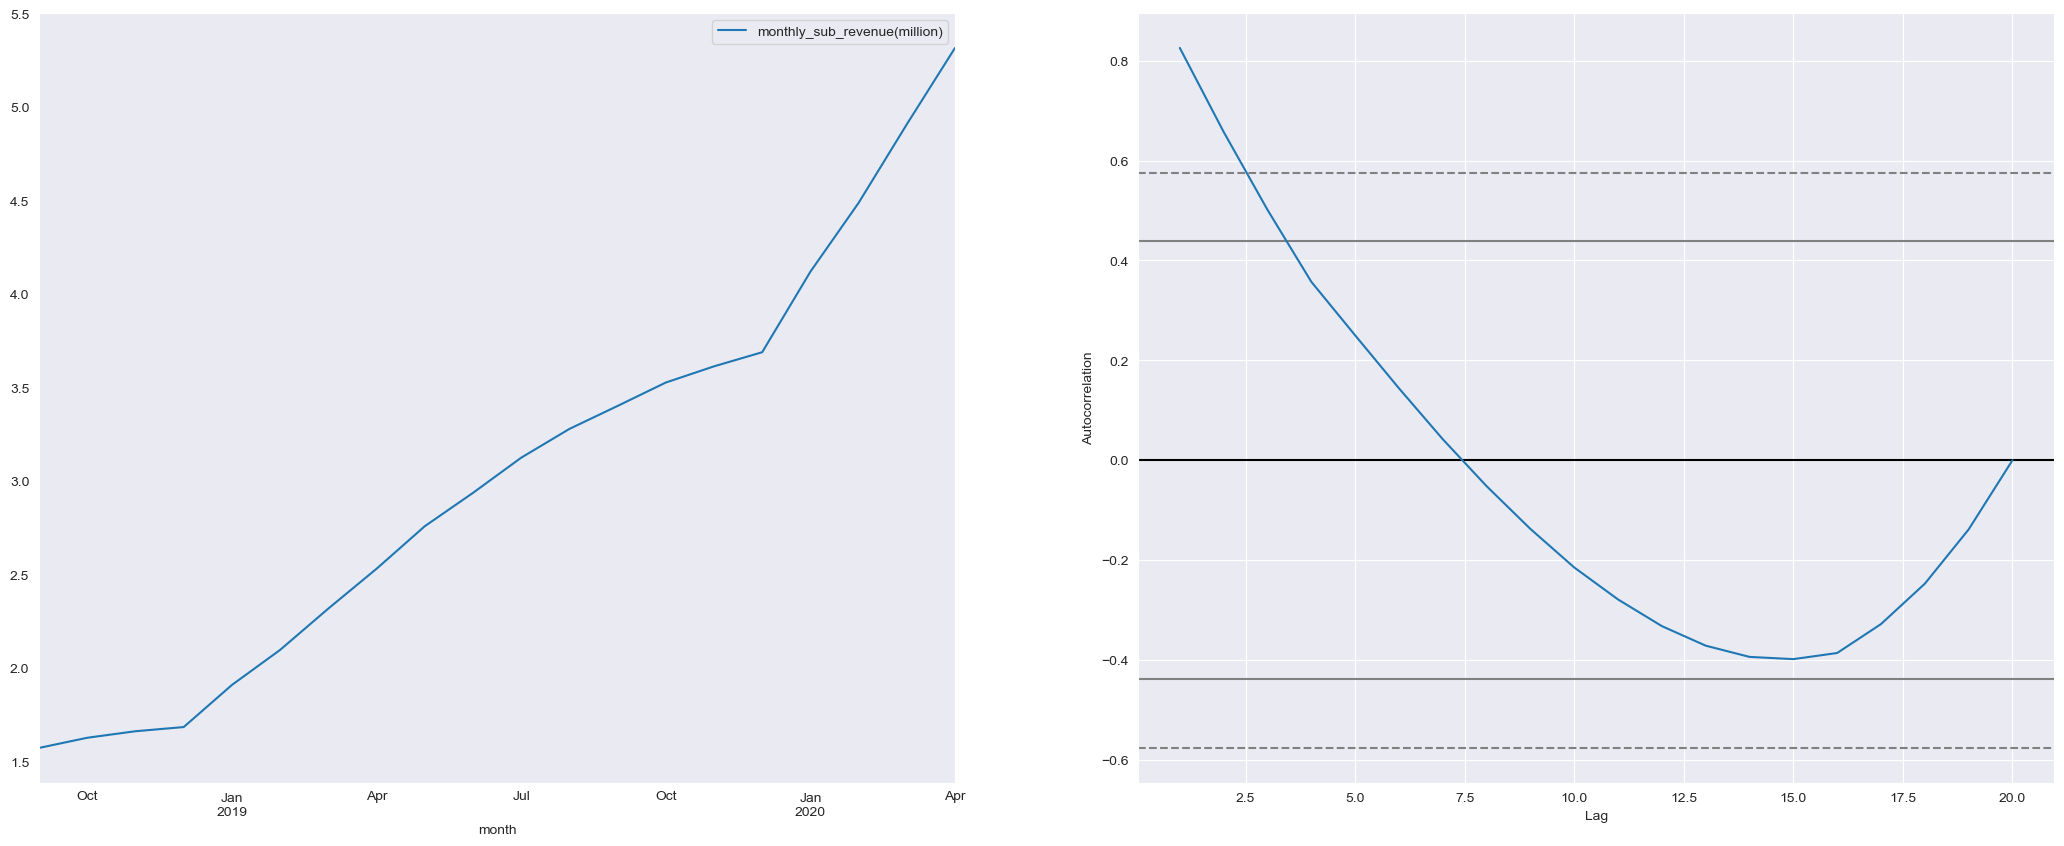

In [91]:
axs = plt.subplots(1, 2, figsize=(26, 10))[1]
_ = train_data.plot(ax=axs[0])
_ = pd.plotting.autocorrelation_plot(train_data, ax=axs[1])

In [92]:
#The trained plot shows a trend of going up every year, and correlation barely goes near the line 0

#The data is therefore not stationary

In [93]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Test Statistic: %.4f' % result[0])
print('5%% Critical Value: %.4f' % result[4]['5%'])
print('p-value: %.4f' % result[1])

ADF Test Statistic: -1.2359
5% Critical Value: -3.1894
p-value: 0.6580


In [94]:
#The abs(ADF) < abs(Critical Value) and p-value > 0.05 also show that the data is non-stationary

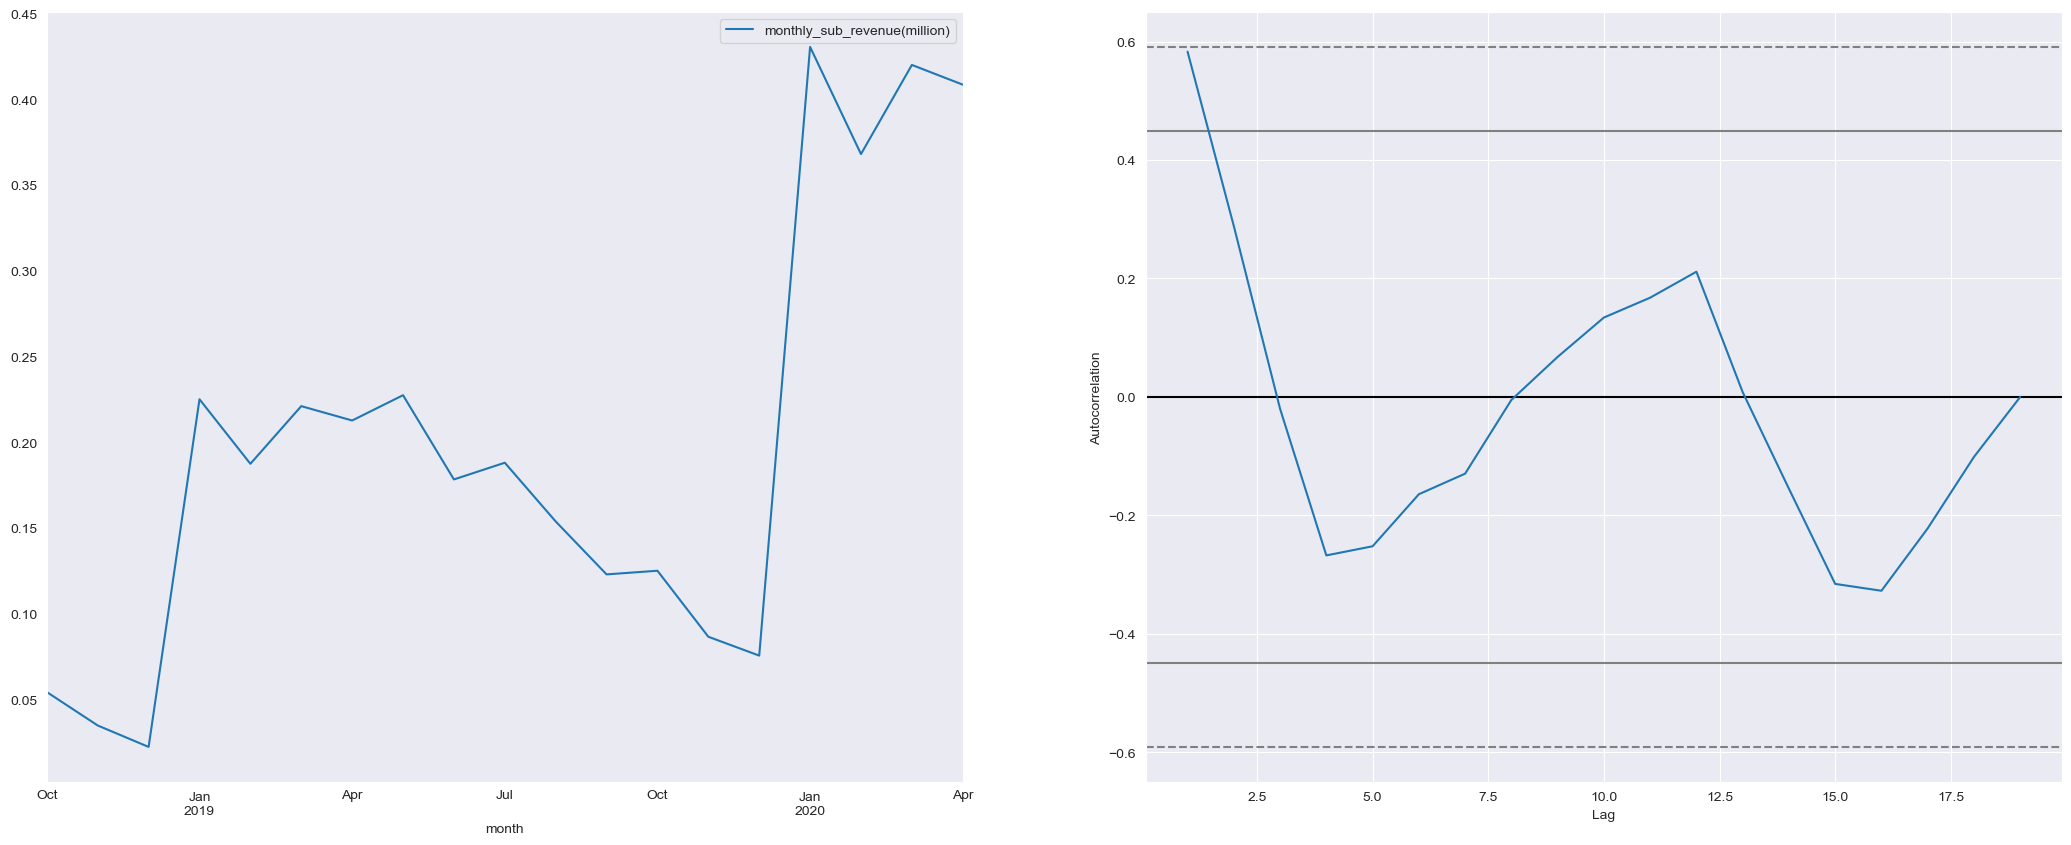

In [95]:
axs = plt.subplots(1, 2, figsize=(26, 10))[1]
_ = train_data.diff().dropna().plot(ax=axs[0])
_ = pd.plotting.autocorrelation_plot(train_data.diff().dropna(), ax=axs[1])

In [96]:
result = adfuller(train_data.diff().dropna())
print('ADF Test Statistic: %.4f' % result[0])
print('5%% Critical Value: %.4f' % result[4]['5%'])
print('p-value: %.4f' % result[1])

ADF Test Statistic: -1.3064
5% Critical Value: -3.0849
p-value: 0.6262


In [97]:
#The difference of revenue between adjacent months is stationary

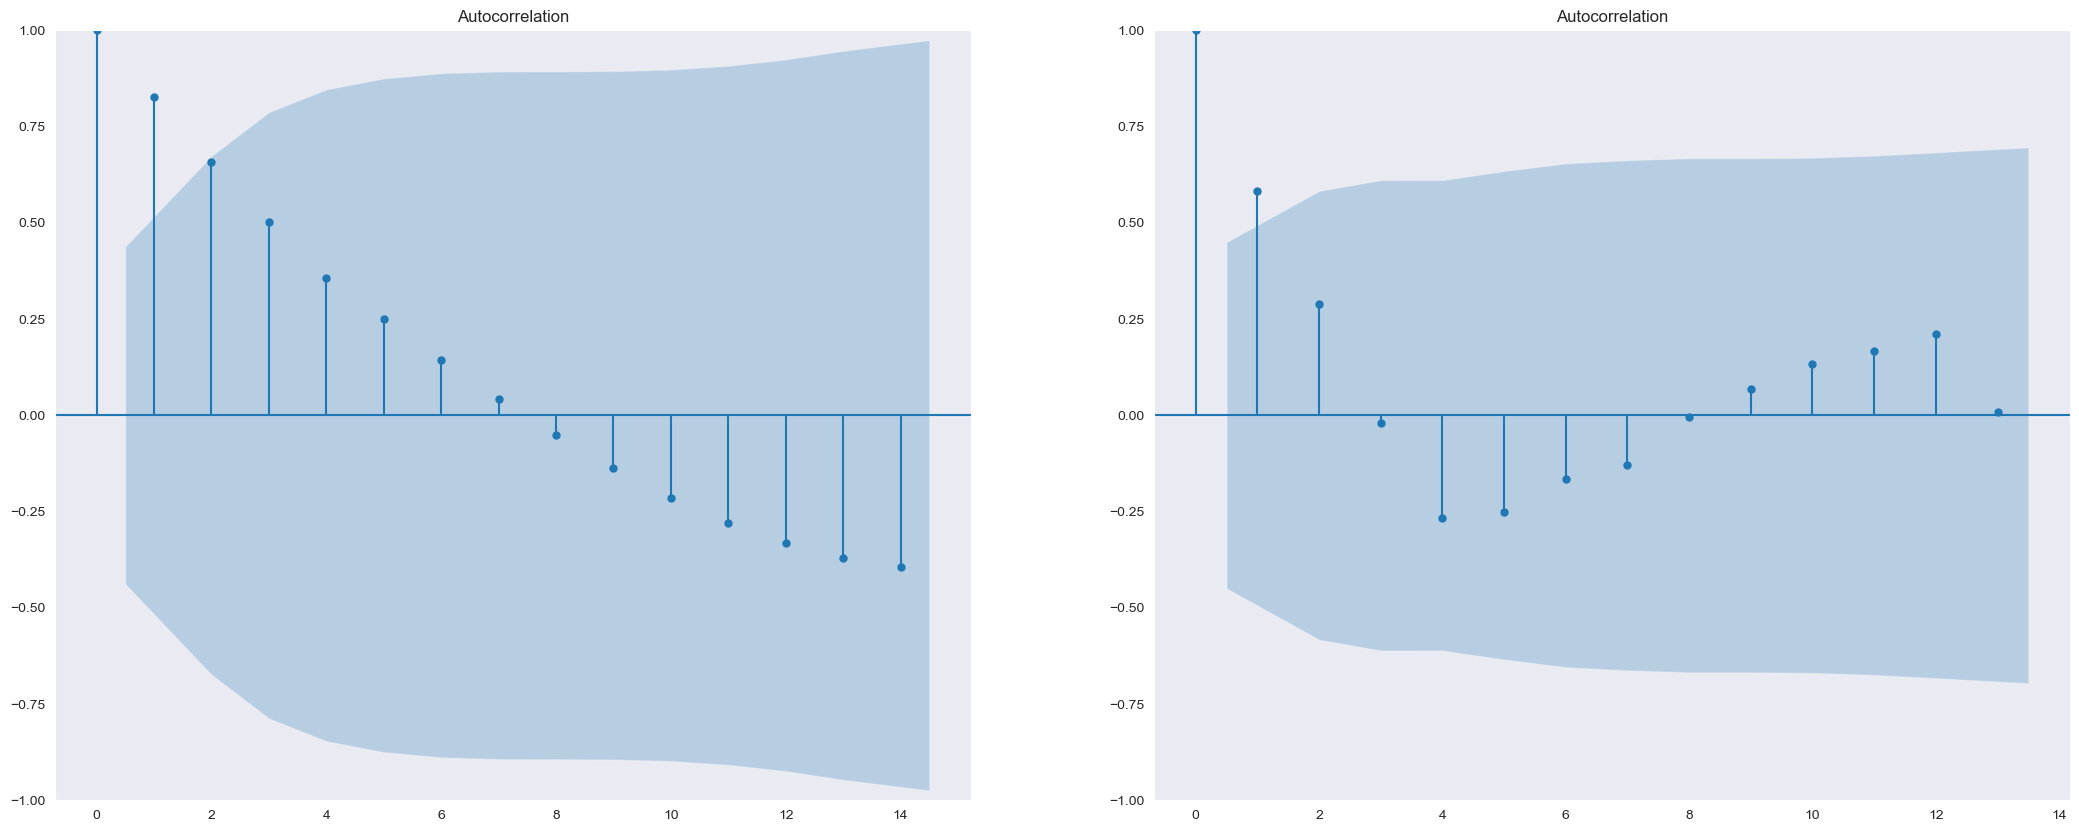

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

axs = plt.subplots(1,2,figsize=(26, 10))[1]
plot_acf(train_data, ax=axs[0]);
plot_acf(train_data.diff().dropna(), ax=axs[1]);

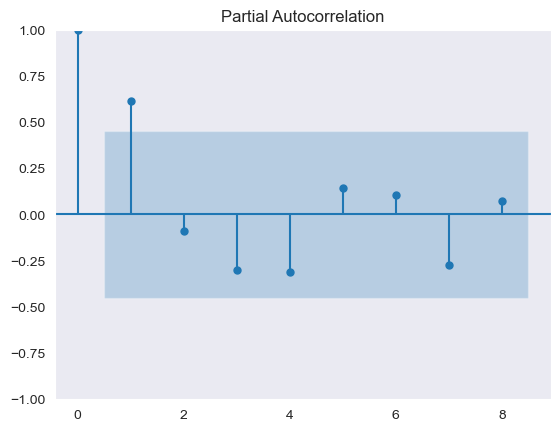

In [99]:
plot_pacf(train_data.diff().dropna(), lags=8);

In [100]:
from statsmodels.tsa.arima.model import ARIMA
from pprint import pprint

arima_model = ARIMA(train_data, order=(1, 1, 0))
model = arima_model.fit()
pprint(model.summary())

C:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
Dep. Variable:     monthly_sub_revenue(million)   No. Observations:                   20
Model:                           ARIMA(1, 1, 0)   Log Likelihood                  15.956
Date:                          Sat, 15 Apr 2023   AIC                            -27.912
Time:                                  13:04:40   BIC                            -26.024
Sample:                              09-01-2018   HQIC                           -27.593
                                   - 04-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9220      0.146      6.328      0.000       0.636       1.208
sig

In [101]:
prediction = model.predict(dynamic=False)

In [102]:
Mape = np.mean(np.abs(np.array(prediction) - np.array(train_data).flatten())/np.abs(np.array(train_data).flatten()))
1-Mape

0.9321341110240876

In [103]:
# According to MAPE score, our model has 93% accuracy on predicting the annual subs revenue, which is a strong enough result to use to predict future monthly subscription revenue